In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
 
import warnings
warnings.filterwarnings('ignore')

# import and read data set

In [2]:
df1 = pd.read_csv('Sales.csv')
df1

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
df1.Product_Category.value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

In [4]:
df1.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [5]:
df1.shape

(113036, 18)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

#  this data not null values

In [7]:
df1.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [8]:
df1.nunique()

Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Profit              1256
Cost                 360
Revenue             1876
dtype: int64

In [9]:
df1.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


<AxesSubplot:xlabel='Profit'>

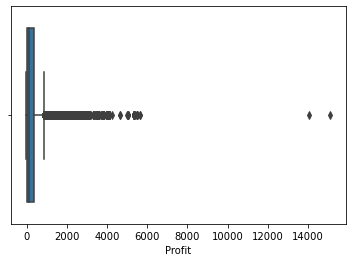

In [10]:
sns.boxplot(df1.Profit)

In [11]:
df1=df1[df1.Profit<=4000]

<AxesSubplot:xlabel='Profit'>

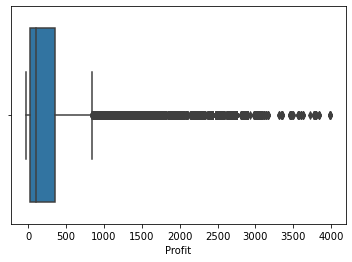

In [12]:
sns.boxplot(df1.Profit)

<AxesSubplot:xlabel='Cost'>

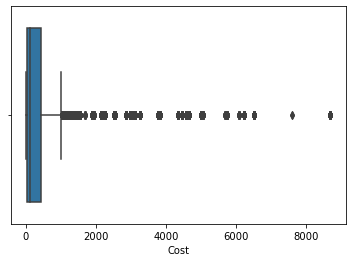

In [13]:
sns.boxplot(df1.Cost)

In [14]:
df1=df1[df1.Cost<=4000]

<AxesSubplot:xlabel='Cost'>

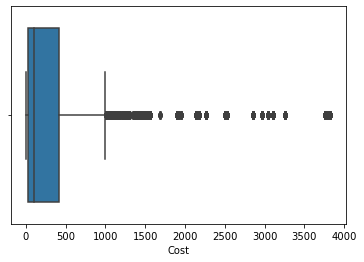

In [15]:
sns.boxplot(df1.Cost)

<AxesSubplot:xlabel='Unit_Cost'>

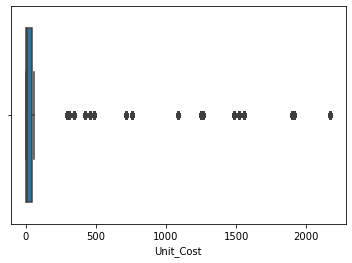

In [16]:
sns.boxplot(df1.Unit_Cost)

In [17]:
df1=df1[df1.Cost<=2000]

In [18]:
df1.shape

(105893, 18)

<AxesSubplot:xlabel='Cost'>

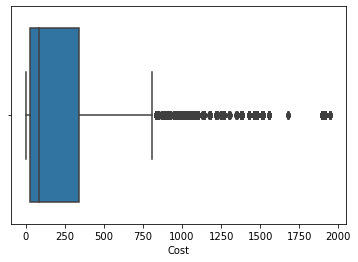

In [19]:
sns.boxplot(df1.Cost)

<AxesSubplot:xlabel='Unit_Price'>

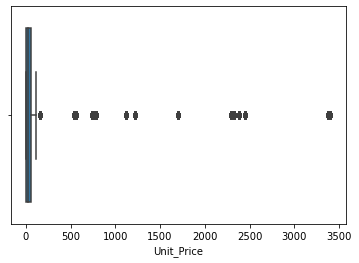

In [20]:
sns.boxplot(df1.Unit_Price)

In [21]:
df1=df1[df1.Unit_Price<=3000]
df1.shape

(105462, 18)

<AxesSubplot:xlabel='Unit_Price'>

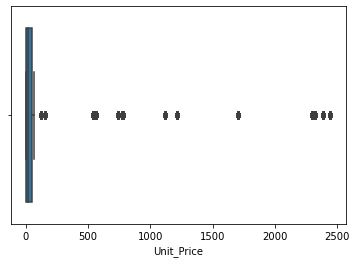

In [22]:
sns.boxplot(df1.Unit_Price)

<AxesSubplot:xlabel='Revenue'>

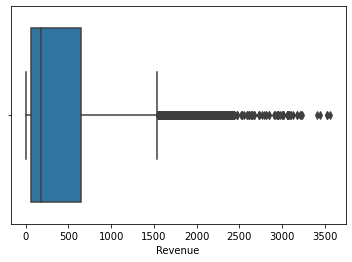

In [23]:
sns.boxplot(df1.Revenue)

In [24]:
df1=df1[df1.Revenue<=3000]
df1.shape

(105429, 18)

<AxesSubplot:xlabel='Revenue'>

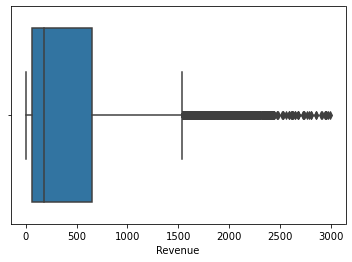

In [25]:
sns.boxplot(df1.Revenue)

In [26]:
corr =df1.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.005032,-0.014495,-0.000970,-0.002725,-0.002749,-0.001068,-0.003239,-0.002559
Year,-0.005032,1.000000,0.034417,0.086371,-0.159052,-0.155070,-0.112725,-0.163165,-0.152242
Customer_Age,-0.014495,0.034417,1.000000,0.021366,-0.006729,-0.005312,0.031649,0.004746,0.015652
Order_Quantity,-0.000970,0.086371,0.021366,1.000000,-0.487456,-0.484993,-0.091706,-0.298284,-0.233072
Unit_Cost,-0.002725,-0.159052,-0.006729,-0.487456,1.000000,0.996921,0.672213,0.883283,0.848674
Unit_Price,-0.002749,-0.155070,-0.005312,-0.484993,0.996921,1.000000,0.689697,0.878745,0.852597
Profit,-0.001068,-0.112725,0.031649,-0.091706,0.672213,0.689697,1.000000,0.782054,0.911562
Cost,-0.003239,-0.163165,0.004746,-0.298284,0.883283,0.878745,0.782054,1.000000,0.969132
Revenue,-0.002559,-0.152242,0.015652,-0.233072,0.848674,0.852597,0.911562,0.969132,1.000000


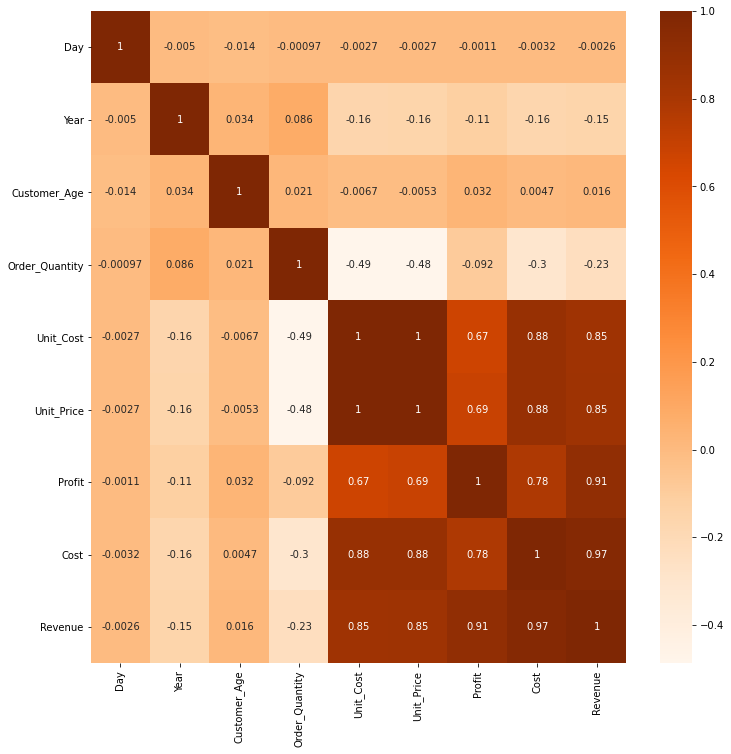

In [27]:
cp = sns.heatmap(corr,cmap='Oranges', annot=True)
plt.gcf().set_size_inches(12,12)

In [28]:
df1.duplicated().values.any()

True

In [29]:
df1.duplicated().sum()

965

In [30]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 105429, dtype: bool

In [31]:
df1.duplicated().values.any()

True

# **Remove duplicated Records**



In [32]:
df1 = df1.drop_duplicates()
df1.shape

(104464, 18)

In [33]:
df1.duplicated().values.any()

False

In [34]:
df1.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

# EDA for dataset

In [35]:
df1.Product_Category.value_counts()

Accessories    69298
Bikes          18238
Clothing       16928
Name: Product_Category, dtype: int64

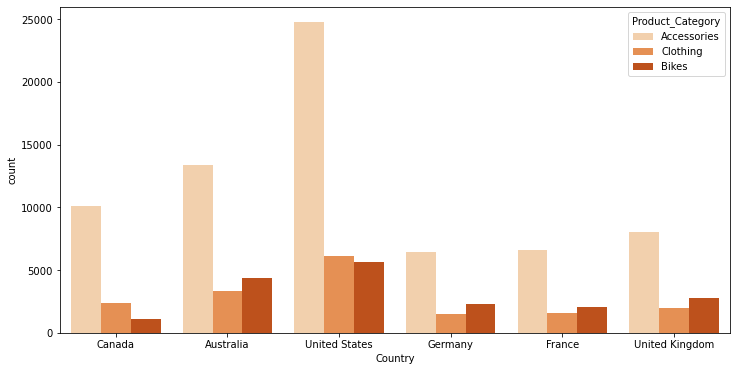

In [36]:
df1.groupby(['Country', 'Product_Category'])['Revenue'].sum()
sns.countplot(data = df1, x='Country', hue='Product_Category', palette=('Oranges'))
plt.savefig('product11.jpg')
plt.gcf().set_size_inches(12,6)

In [37]:
df1['Product_Category'].value_counts()

Accessories    69298
Bikes          18238
Clothing       16928
Name: Product_Category, dtype: int64

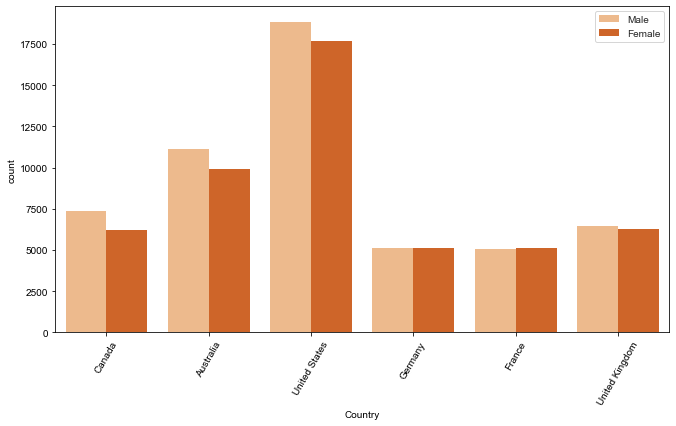

In [38]:
sns.countplot(data = df1, x='Country', hue='Customer_Gender',palette=('Oranges'))
plt.xticks(rotation=60)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(11,6)
plt.savefig('gender2,.jpg')
plt.show()

In [39]:
df_age = df1['Customer_Age'].value_counts()

In [40]:
df_age

31    4087
34    3906
32    3804
29    3795
33    3729
      ... 
86       8
87       6
80       6
76       6
82       4
Name: Customer_Age, Length: 70, dtype: int64

In [41]:
bikes_df =df1[df1['Product_Category']=='Bikes']
bikes_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
49334,2013-08-13,13,August,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49336,2013-09-10,10,September,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49337,2015-09-10,10,September,2015,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49338,2013-10-20,20,October,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49340,2013-12-21,21,December,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112063,2016-04-22,22,April,2016,20,Youth (<25),M,Australia,New South Wales,Bikes,Touring Bikes,"Touring-3000 Blue, 54",3,461,742,554,1383,1937
112064,2013-12-05,5,December,2013,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289
112066,2014-01-18,18,January,2014,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289
112068,2014-02-27,27,February,2014,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289


In [42]:
rs = bikes_df.groupby('Customer_Gender')['Sub_Category'].value_counts()
rs

Customer_Gender  Sub_Category  
F                Road Bikes        3933
                 Mountain Bikes    3398
                 Touring Bikes     1630
M                Road Bikes        4335
                 Mountain Bikes    3297
                 Touring Bikes     1645
Name: Sub_Category, dtype: int64

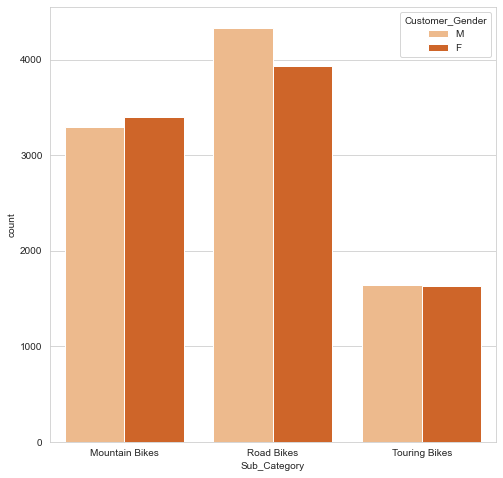

In [43]:
fig, rs = plt.subplots(figsize=(8,8))
rs = bikes_df.groupby('Customer_Gender')['Sub_Category'].value_counts()
plt.savefig('Customer_Gender.jpg')
sns.countplot(data = bikes_df, x='Sub_Category', hue='Customer_Gender',palette=('Oranges'));

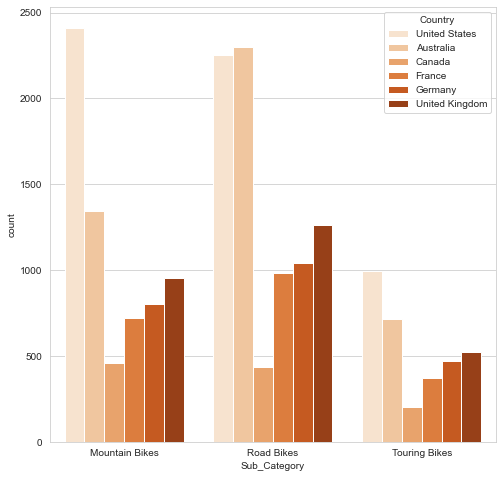

In [44]:
fig, rs = plt.subplots(figsize=(8,8))
rs = bikes_df.groupby('Country')['Sub_Category'].value_counts()
plt.savefig('country1.jpg')
sns.countplot(data = bikes_df, x='Sub_Category', hue='Country',palette=('Oranges'));

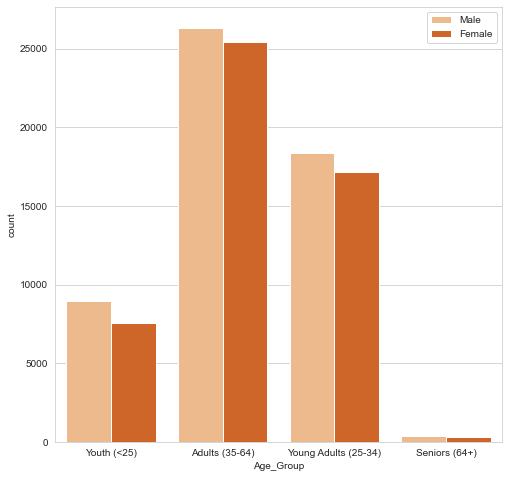

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [45]:
sns.countplot(data = df1, x='Age_Group', hue='Customer_Gender',palette=('Oranges'))
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(8,8)
plt.show()
plt.savefig('Age_Group whith gender.jpg')
plt.figure(figsize=(10,10))

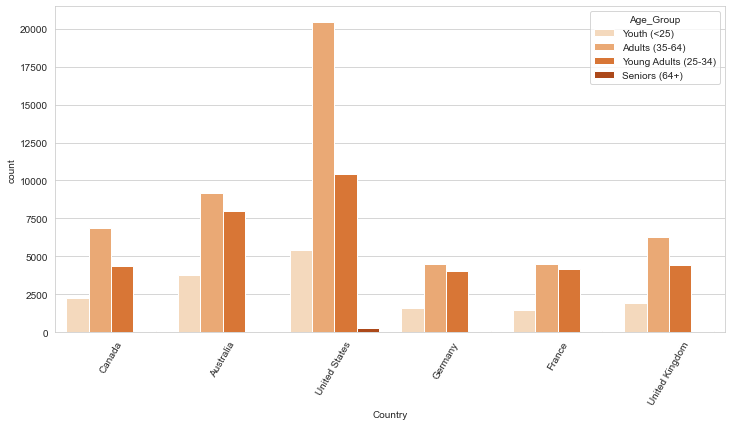

In [46]:
sns.countplot(data = df1, x='Country', hue='Age_Group',palette=('Oranges'))
plt.xticks(rotation=60)
sns.set_style("whitegrid")
plt.gcf().set_size_inches(12,6)
plt.savefig('country.jpg')
plt.show()

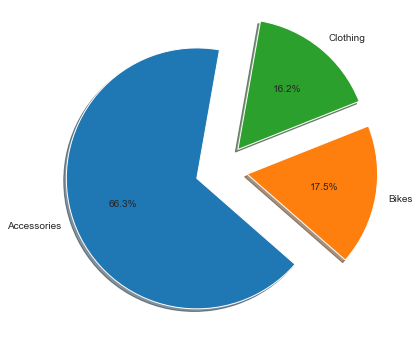

In [47]:
df_product = df1['Product_Category'].value_counts()
label= [df_product.index.tolist()]
plt.pie(df_product, shadow=True,labels=label[0],explode=(0.2, 0.2, 0.2), autopct='%1.1f%%', startangle=80)
plt.gcf().set_size_inches(12,6)
plt.savefig('product.jpg')
plt.show()

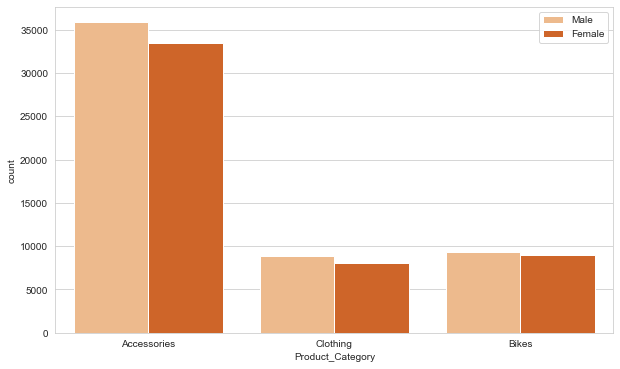

In [48]:
sns.countplot(data = df1, x='Product_Category', hue='Customer_Gender', palette=('Oranges'))
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(10,6)
plt.savefig('customer.jpg')
plt.show()

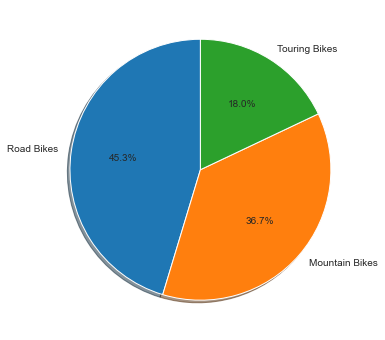

In [49]:
df_Bikes = df1[df1['Product_Category'] == 'Bikes']
df_Bikes = df_Bikes['Sub_Category'].value_counts()

label = [df_Bikes.index.tolist()]
plt.pie(df_Bikes, shadow=True, autopct='%1.1f%%', startangle=90, labels=label[0])
plt.gcf().set_size_inches(12,6)
plt.savefig('sub.jpg')
plt.show()

In [50]:
bikes_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
49334,2013-08-13,13,August,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49336,2013-09-10,10,September,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49337,2015-09-10,10,September,2015,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49338,2013-10-20,20,October,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
49340,2013-12-21,21,December,2013,18,Youth (<25),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,1266,2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112063,2016-04-22,22,April,2016,20,Youth (<25),M,Australia,New South Wales,Bikes,Touring Bikes,"Touring-3000 Blue, 54",3,461,742,554,1383,1937
112064,2013-12-05,5,December,2013,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289
112066,2014-01-18,18,January,2014,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289
112068,2014-02-27,27,February,2014,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289


In [51]:
da = bikes_df.groupby('Country')['Sub_Category','Unit_Price'].max()
da

,Sub_Category,Unit_Price
Country,,
Australia,Touring Bikes,2443
Canada,Touring Bikes,2443
France,Touring Bikes,2443
Germany,Touring Bikes,2443
United Kingdom,Touring Bikes,2443
United States,Touring Bikes,2443


In [52]:
most_years = bikes_df.groupby('Year')['Sub_Category','Unit_Price'].sum()
most_years

,Unit_Price
Year,
2011,2031523
2012,799282
2013,7697797
2014,6577368
2015,5531987
2016,4796515


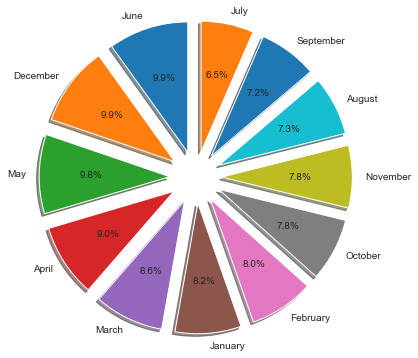

In [53]:
df_product_month = df1['Month'].value_counts()

label= [df_product_month.index.tolist()]
plt.pie(df_product_month, shadow=True, labels=label[0], explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
        autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.savefig(' based on Month.jpg')
plt.show()


[Text(0.5, 0, 'Profit'), Text(0, 0.5, 'Country')]

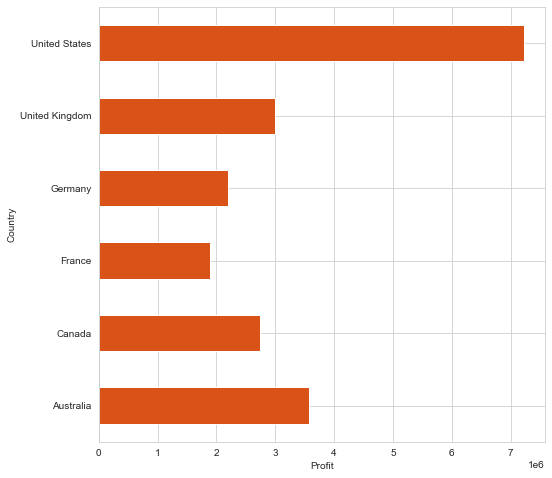

In [54]:
plt.figure(figsize=(8,8))
ax = df1.groupby('Country')['Profit'].sum().plot(kind='barh',color=[0.8500, 0.3250, 0.0980])
ax.set(xlabel='Profit', ylabel='Country')

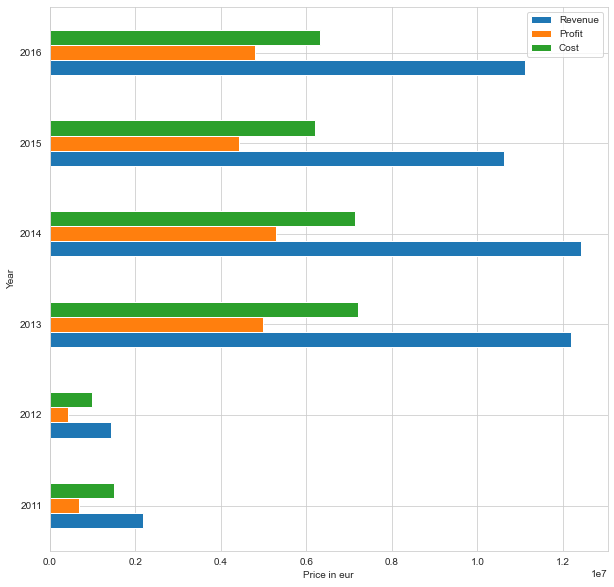

In [55]:
ax = df1.groupby('Year')['Revenue', 'Profit', 'Cost'].sum().plot(kind='barh')
ax.set(xlabel='Price in eur', ylabel='Year')
plt.savefig(' based on Month.jpg')
plt.gcf().set_size_inches(10,10)


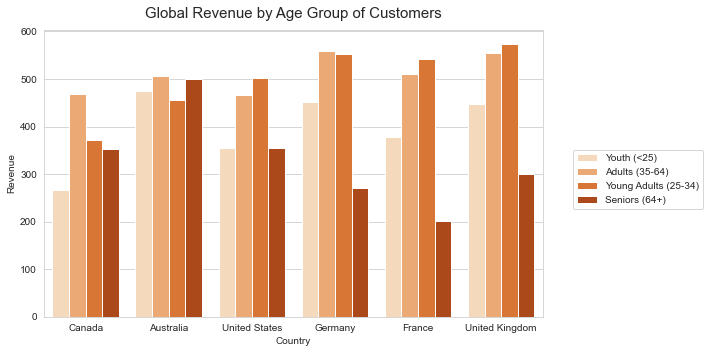

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= df1, x='Country', y='Revenue', hue='Age_Group',  palette=('Oranges') ,alpha=1,ci=None, ax=ax)
plt.title('Global Revenue by Age Group of Customers',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.savefig('evenue by Age Group1.jpg')
plt.show()

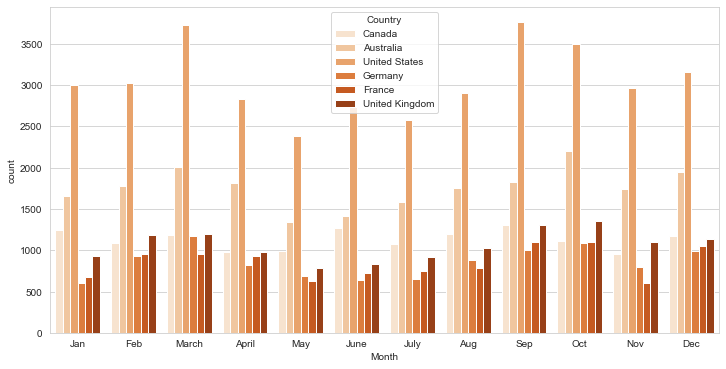

In [57]:
# Check sales by season and country

label = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data = df1, x='Month', hue='Country', palette=('Oranges'))
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=label)
sns.set_style("whitegrid")
plt.gcf().set_size_inches(12,6)
plt.savefig('month1.jpg')
plt.show()

<Figure size 720x720 with 0 Axes>

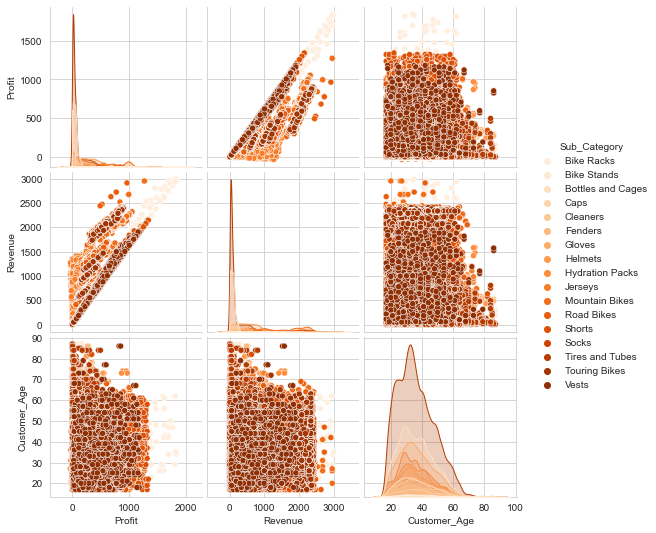

In [58]:
cols_to_plot = ['Sub_Category', 'Profit', 'Revenue', 'Customer_Age']
plt.figure(figsize=(10,10))
sns.pairplot(df1[cols_to_plot], hue='Sub_Category',palette=('Oranges'))
plt.show() 

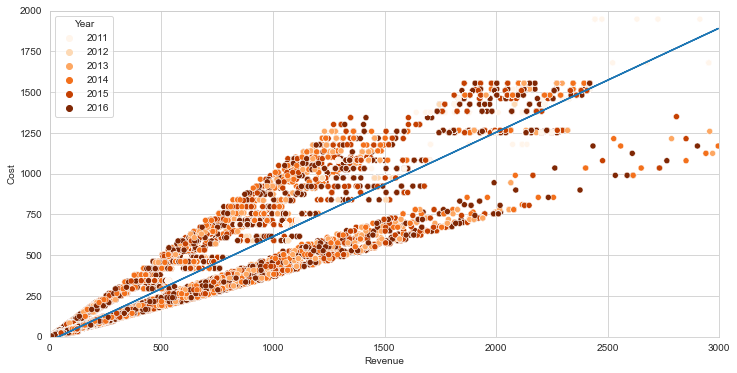

In [59]:
# Correlation plot Revenue vs Cost

sns.scatterplot(data=df1, x="Revenue", y="Cost", hue='Year', palette=('Oranges'))
plt.xlim(0,3000)
plt.ylim(0,2000)
plt.gcf().set_size_inches(12,6)

m, b = np.polyfit(df1["Revenue"], df1["Cost"], 1)
plt.savefig('revenue.jpg')
plt.plot(df1["Revenue"], m*df1["Revenue"] + b);

In [60]:
df1.columns


Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [61]:
df1.drop('Order_Quantity',axis =1,inplace=True)

In [62]:
df1.drop('Unit_Cost',axis =1,inplace=True)

In [63]:
df1.drop('Unit_Price',axis =1,inplace=True)

In [64]:
df1.drop('Revenue',axis =1,inplace=True)

In [65]:
df1

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Profit,Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,590,360
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,590,360
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,1366,1035
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,1188,900
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,238,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",112,72
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",655,528
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",655,528
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",684,576


In [66]:
df1.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Profit               int64
Cost                 int64
dtype: object

In [67]:
bike = df1.select_dtypes(exclude=['object']).copy()

In [68]:
bike

,Day,Year,Customer_Age,Profit,Cost
0,26,2013,19,590,360
1,26,2015,19,590,360
2,23,2014,49,1366,1035
3,23,2016,49,1188,900
4,15,2014,47,238,180
...,...,...,...,...,...
113031,12,2016,41,112,72
113032,2,2014,18,655,528
113033,2,2016,18,655,528
113034,4,2014,37,684,576


In [69]:
bike['Customer_Age'] = df1['Customer_Age']

In [70]:
bike['Customer_Gender'] = df1['Customer_Gender']

In [71]:
bike['Country'] = df1['Country']

In [72]:
bike['Product_Category'] = df1['Product_Category']

In [73]:
bike

,Day,Year,Customer_Age,Profit,Cost,Customer_Gender,Country,Product_Category
0,26,2013,19,590,360,M,Canada,Accessories
1,26,2015,19,590,360,M,Canada,Accessories
2,23,2014,49,1366,1035,M,Australia,Accessories
3,23,2016,49,1188,900,M,Australia,Accessories
4,15,2014,47,238,180,F,Australia,Accessories
...,...,...,...,...,...,...,...,...
113031,12,2016,41,112,72,M,United Kingdom,Clothing
113032,2,2014,18,655,528,M,Australia,Clothing
113033,2,2016,18,655,528,M,Australia,Clothing
113034,4,2014,37,684,576,F,France,Clothing


In [74]:
bike = pd.get_dummies(bike)

In [75]:
bike

,Day,Year,Customer_Age,Profit,Cost,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
0,26,2013,19,590,360,0,1,0,1,0,0,0,0,1,0,0
1,26,2015,19,590,360,0,1,0,1,0,0,0,0,1,0,0
2,23,2014,49,1366,1035,0,1,1,0,0,0,0,0,1,0,0
3,23,2016,49,1188,900,0,1,1,0,0,0,0,0,1,0,0
4,15,2014,47,238,180,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,2016,41,112,72,0,1,0,0,0,0,1,0,0,0,1
113032,2,2014,18,655,528,0,1,1,0,0,0,0,0,0,0,1
113033,2,2016,18,655,528,0,1,1,0,0,0,0,0,0,0,1
113034,4,2014,37,684,576,1,0,0,0,1,0,0,0,0,0,1


In [76]:
bike.shape

(104464, 16)

In [77]:
bike.columns

Index(['Day', 'Year', 'Customer_Age', 'Profit', 'Cost', 'Customer_Gender_F',
       'Customer_Gender_M', 'Country_Australia', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_United Kingdom',
       'Country_United States', 'Product_Category_Accessories',
       'Product_Category_Bikes', 'Product_Category_Clothing'],
      dtype='object')

In [78]:
X, y = bike.drop('Profit',axis=1), bike['Profit']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=100)

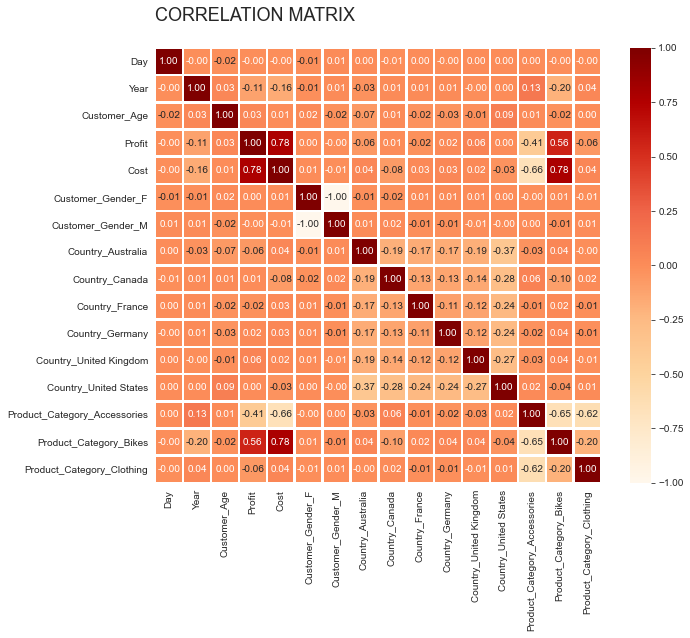

In [80]:
plt.rcParams["figure.figsize"] = (10,8);

sns.heatmap(bike.corr(), cmap = 'OrRd', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f');
plt.title('CORRELATION MATRIX\n', loc='left', fontsize=18);

In [81]:
X_train_val

,Day,Year,Customer_Age,Cost,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
32474,29,2014,23,52,1,0,0,0,0,0,0,1,1,0,0
49867,26,2011,31,1266,1,0,0,0,0,1,0,0,0,1,0
38940,23,2014,23,234,0,1,0,0,0,0,0,1,1,0,0
48775,14,2016,30,210,1,0,1,0,0,0,0,0,0,0,1
16441,28,2015,47,46,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73190,16,2013,26,676,0,1,1,0,0,0,0,0,0,0,1
85406,28,2016,37,36,0,1,0,0,0,0,0,1,1,0,0
87464,21,2014,25,270,1,0,0,0,0,1,0,0,1,0,0
59429,18,2011,19,1426,0,1,0,0,0,0,0,1,0,1,0


In [82]:
len(X_train_val.index)

83571

In [83]:
y_train_val

32474     85
49867    892
38940    383
48775     25
16441     54
        ... 
73190    816
85406     34
87464    428
59429    769
38658    427
Name: Profit, Length: 83571, dtype: int64

In [84]:
len(y_train_val.index)

83571

In [85]:
len(X_test)

20893

In [86]:
len(y_test)

20893

In [87]:
X_train_val.index

Int64Index([32474, 49867, 38940, 48775, 16441, 82233, 15148, 56143, 27506,
            40128,
            ...
            83341, 14469, 90101, 70110, 89664, 73190, 85406, 87464, 59429,
            38658],
           dtype='int64', length=83571)

In [88]:
X_test.index

Int64Index([ 26958,  41194,  84806,  64747,   5308,   3593,   9881,   2810,
             88527, 112302,
            ...
            104286,  62050,  29293,  84608, 100024,  99927,    726,  57139,
            104365,  89156],
           dtype='int64', length=20893)

In [89]:
X_train

,Day,Year,Customer_Age,Cost,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
69678,30,2012,31,1426,0,1,1,0,0,0,0,0,0,1,0
46795,2,2016,32,588,0,1,1,0,0,0,0,0,0,0,1
23101,27,2015,19,56,1,0,0,0,0,0,0,1,1,0,0
96939,9,2015,43,286,1,0,0,0,0,1,0,0,1,0,0
109824,9,2013,39,1482,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73190,16,2013,26,676,0,1,1,0,0,0,0,0,0,0,1
85406,28,2016,37,36,0,1,0,0,0,0,0,1,1,0,0
87464,21,2014,25,270,1,0,0,0,0,1,0,0,1,0,0
59429,18,2011,19,1426,0,1,0,0,0,0,0,1,0,1,0


In [90]:
y_train

69678     344
46795      70
23101      76
96939     439
109824    807
         ... 
73190     816
85406      34
87464     428
59429     769
38658     427
Name: Profit, Length: 78348, dtype: int64

# Linear Regression

In [91]:
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_train,y_train)

0.6478252733169905

In [92]:
scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)


In [93]:
lm = LinearRegression().fit(X_train_scaled,y_train)
lm.score(X_train_scaled,y_train)

0.6478222179769408

# Ridge Regression

In [94]:
lr_model_ridge = Ridge(alpha = 1000000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))


[('Day', 0.002318779444739704),
 ('Year', 0.3156929738716463),
 ('Customer_Age', 0.520318489129694),
 ('Cost', 0.469483371632638),
 ('Customer_Gender_F', -0.016417268821908106),
 ('Customer_Gender_M', 0.016417268821908113),
 ('Country_Australia', -0.6379328826400509),
 ('Country_Canada', 0.4130034759180641),
 ('Country_France', -0.2214425147495114),
 ('Country_Germany', -0.031212073658710517),
 ('Country_United Kingdom', 0.2591210368095957),
 ('Country_United States', 0.21846295832061446),
 ('Product_Category_Accessories', 0.9672028005265383),
 ('Product_Category_Bikes', -0.33271336050415967),
 ('Product_Category_Clothing', -0.6344894400223958)]

In [95]:
lm_reg = Ridge(alpha=1)

# Polynomial Regression

In [96]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression().fit(X_train_poly,y_train)
lm_poly.score (X_train_poly,y_train)

0.814307275239943

In [97]:
poly3 = PolynomialFeatures(degree=3) 

X_train_poly3 = poly3.fit_transform(X_train.values)
X_val_poly3 = poly3.transform(X_val.values)
X_test_poly3 = poly3.transform(X_test.values)

lm_poly3 = LinearRegression().fit(X_train_poly3,y_train)
lm_poly3.score (X_train_poly3,y_train)

0.8317658507996375

In [98]:
poly4 = PolynomialFeatures(degree=4) 

X_train_poly4 = poly4.fit_transform(X_train.values)
X_val_poly4 = poly4.transform(X_val.values)
X_test_poly4 = poly4.transform(X_test.values)

lm_poly4 = LinearRegression().fit(X_train_poly4,y_train)
lm_poly4.score (X_train_poly4,y_train)

0.8392880599242264

# Linear , Ridge and Polynomial Regression

In [99]:
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')

lm_poly4.fit(X_train_poly4, y_train)
print(f'Degree 4 polynomial regression train R^2: {lm_poly4.score(X_train_poly4, y_train):.3f}')

Linear Regression train R^2: 0.648
Ridge Regression train R^2: 0.648
Degree 2 polynomial regression train R^2: 0.814
Degree 4 polynomial regression train R^2: 0.839


In [100]:
lm.fit(X_val, y_val)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_val_scaled, y_val)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_val_poly, y_val)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

lm_poly3.fit(X_val_poly4, y_val)
print(f'Degree 4 polynomial regression val R^2: {lm_poly4.score(X_val_poly4, y_val):.3f}')

Linear Regression val R^2: 0.643
Ridge Regression val R^2: 0.643
Degree 2 polynomial regression val R^2: 0.818
Degree 4 polynomial regression val R^2: 0.840


In [101]:
lm.fit(X_test, y_test)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

lm_reg.fit(X_test_scaled, y_test)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

lm_poly.fit(X_test_poly, y_test)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

lm_poly3.fit(X_test_poly4, y_test)
print(f'Degree 4 polynomial regression test R^2: {lm_poly4.score(X_test_poly4, y_test):.3f}')

Linear Regression test R^2: 0.645
Ridge Regression test R^2: 0.645
Degree 2 polynomial regression test R^2: 0.819
Degree 4 polynomial regression test R^2: 0.842


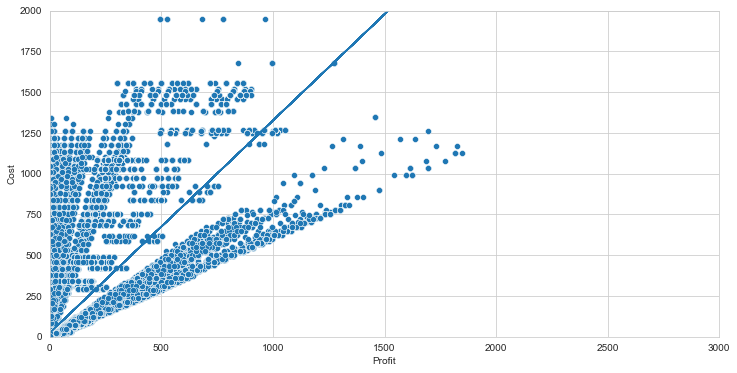

In [102]:
sns.scatterplot(data=bike, x="Profit", y="Cost", palette=('OrRd_r'))
plt.xlim(0,3000)
plt.ylim(0,2000)
plt.gcf().set_size_inches(12,6)

m, b = np.polyfit(bike["Profit"], bike["Cost"], 1)
plt.savefig('cost.jpg')
plt.plot(bike["Profit"], m*bike["Profit"] + b)

In [103]:
lasso_model = Lasso(alpha = 10000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_val , y_val)

Lasso(alpha=10000)

In [104]:
list(zip(X_val.columns, lasso_model.coef_))

[('Day', 0.0),
 ('Year', -0.0),
 ('Customer_Age', 0.0),
 ('Cost', 0.4077742396225982),
 ('Customer_Gender_F', -0.0),
 ('Customer_Gender_M', 0.0),
 ('Country_Australia', -0.0),
 ('Country_Canada', 0.0),
 ('Country_France', -0.0),
 ('Country_Germany', 0.0),
 ('Country_United Kingdom', 0.0),
 ('Country_United States', 0.0),
 ('Product_Category_Accessories', 0.0),
 ('Product_Category_Bikes', 0.0),
 ('Product_Category_Clothing', -0.0)]

In [105]:
lasso_model.score(X_train,y_train)

0.6016047102182706

In [106]:
#from sklearn.tree import DecisionTreeRegressor

In [107]:
#td = DecisionTreeRegressor(random_state =100,max_depth=8) 

In [108]:
#td.fit(X_train,y_train)

In [109]:
#td.score(X_train,y_train)

In [110]:
#td.score(X_val,y_val)

In [111]:
#td.score(X_test,y_test)